In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv('reviews.csv')
df.head()

,rating,date,review,platform
0,2,30 December 2024,"I was using it for long time, but have to stop...",blinkit
1,1,4 November 2024,Loving the fast deliveries and mostly they are...,blinkit
2,1,31 October 2024,The customer support is very disappointing. I ...,blinkit
3,5,29 August 2024,"I've been using Blinkit for a while now, and i...",blinkit
4,2,31 December 2024,Blinkit was my go to app and it was rare that ...,blinkit


C:\Users\kk061\AppData\Local\Temp\ipykernel_19760\4191030826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


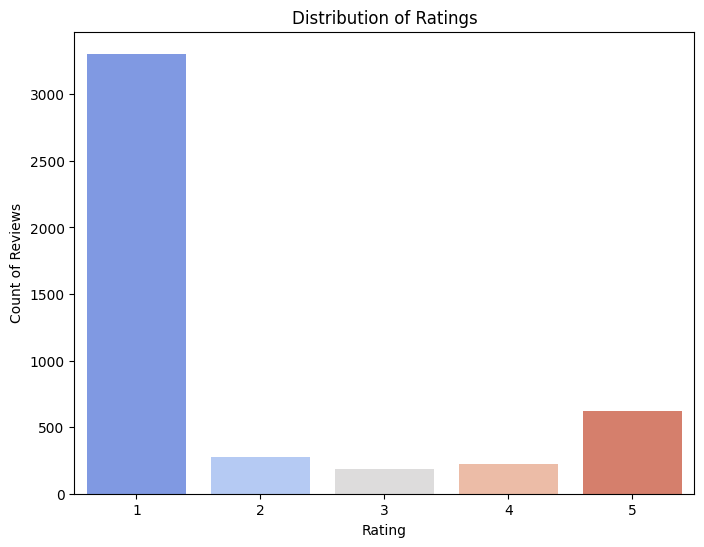

In [84]:
# Plot Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.show()

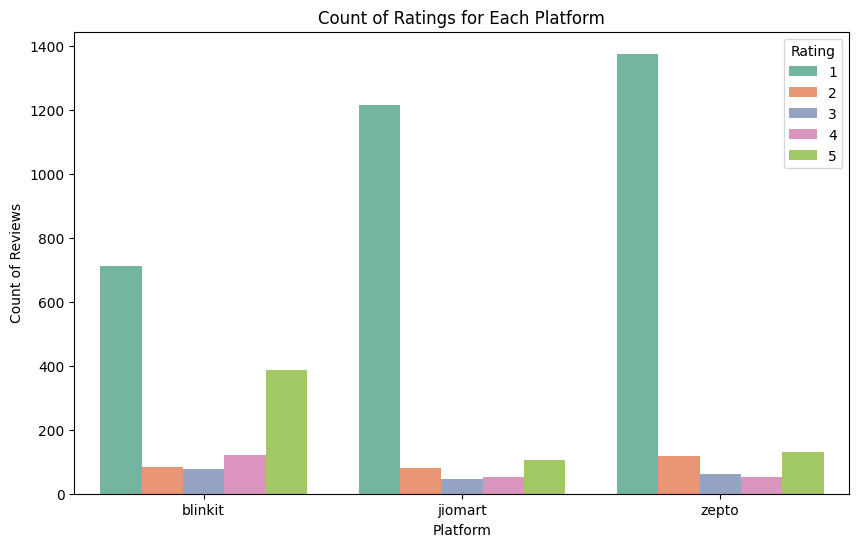

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='platform', hue='rating', palette='Set2')
plt.title('Count of Ratings for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Count of Reviews')
plt.legend(title='Rating', loc='upper right')
plt.show()

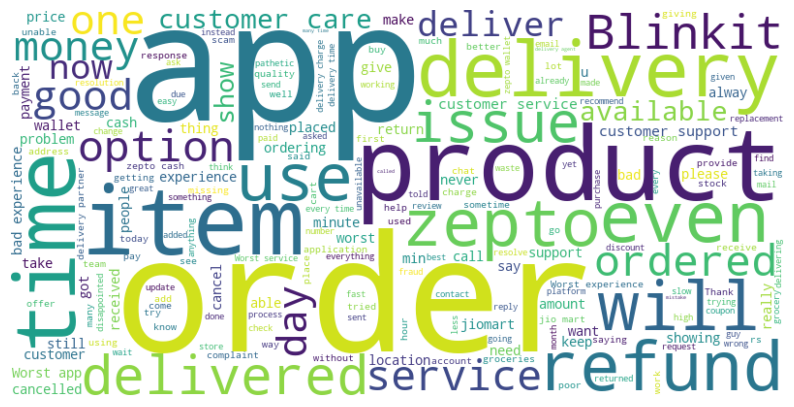

In [86]:
from wordcloud import WordCloud
all_reviews = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [87]:
def categorize_rating(rating):
    if rating == 1 or rating == 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating == 4 or rating == 5:
        return 'positive'

df['rating_label'] = df['rating'].apply(categorize_rating)


In [88]:
df

,rating,date,review,platform,rating_label
0,2,30 December 2024,"I was using it for long time, but have to stop...",blinkit,negative
1,1,4 November 2024,Loving the fast deliveries and mostly they are...,blinkit,negative
2,1,31 October 2024,The customer support is very disappointing. I ...,blinkit,negative
3,5,29 August 2024,"I've been using Blinkit for a while now, and i...",blinkit,positive
4,2,31 December 2024,Blinkit was my go to app and it was rare that ...,blinkit,negative
...,...,...,...,...,...
4615,1,27 November 2024,I have deposited ₹1300 to my zepto wallet to o...,zepto,negative
4616,4,5 December 2024,Prices r competitive for certain items. Not fo...,zepto,positive
4617,1,13 November 2024,Worst delivery ever. They delivered a broken p...,zepto,negative
4618,5,17 November 2024,"I had a great experience with zepto, the quali...",zepto,positive


In [89]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import re

In [90]:
def cleantext(text):
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=text.lower()
    return text

df['cleaned_review']=df['review'].apply(cleantext)

In [91]:
X = df['cleaned_review']
y = df['rating_label']

In [92]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.3,random_state=42)

In [94]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [95]:
param_grid = {
    'multinomialnb__alpha': [0.1, 0.5, 1, 2]   
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1, param_grid={'multinomialnb__alpha': [0.1, 0.5, 1, 2]},
             verbose=1)

In [96]:
print(f"Best hyperparameters: {grid_search.best_params_}")


Best hyperparameters: {'multinomialnb__alpha': 0.1}


In [97]:
best_model = grid_search.best_estimator_


In [98]:
y_pred = best_model.predict(X_test)


In [99]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.99      0.93      1067
     neutral       0.00      0.00      0.00        44
    positive       0.96      0.56      0.71       275

    accuracy                           0.88      1386
   macro avg       0.61      0.52      0.54      1386
weighted avg       0.86      0.88      0.85      1386



c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [100]:
def predict_sentiment(text):
    cleaned_text = cleantext(text)
    sentiment_encoded = best_model.predict([cleaned_text])
    sentiment = label_encoder.inverse_transform(sentiment_encoded)
    return sentiment[0]

new_reviews = [
    "I love how fast Blinkit delivers, it's amazing!",
    "The app keeps crashing and customer support doesn't help.",
    "It's okay, but there are better apps out there."
]

for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: I love how fast Blinkit delivers, it's amazing!
Predicted Sentiment: positive

Review: The app keeps crashing and customer support doesn't help.
Predicted Sentiment: negative

Review: It's okay, but there are better apps out there.
Predicted Sentiment: negative

